In [2]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import os

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import time
# from matplotlib  
# # import cm

matplotlib.rcParams['figure.figsize'] = (4, 3)

# 0. Analyzing Dataset

## 0.1 Determine Dataset size
Green: 1.4m - 1.5m

Yellow: 10.9m - 12.2m

In [4]:
# Identify path from google drive
data_directory = 'dataset/taxi/months/'

# Iterate through each csv from the path, add up the values of the rows and return the final count
def count_rows(directory):
    count = 0
    for file_path in os.listdir(directory):
        if ".csv" in file_path:
            sum_of_records = sum(1 for line in open(directory + file_path));
            count = count + sum_of_records;
            print file_path, "~*~*~*~*~*~", sum_of_records,"~*~*~*~*~*~ Total:", count;
    return count;

# Iterate through each csv from the path and print out the info from panda
def get_csv_info(directory):
    for file_path in os.listdir(directory):
        if ".csv" in file_path:
            print file_path, "~*~*~*~*~*~", sum(1 for line in open(directory + file_path));
            reader = pd.read_csv(directory + file_path, chunksize=1000000)
            for chunk in reader:
                print chunk.info(), '\n'

# Iterate through all csv and get the count and then add up both green and yellow
data = count_rows(data_directory)
# yellow = count_rows(yellow_data_directory)
print "Total Number Of Records:", data

green_tripdata_2015-07.csv ~*~*~*~*~*~ 1541672 ~*~*~*~*~*~ Total: 1541672
green_tripdata_2015-08.csv ~*~*~*~*~*~ 1532344 ~*~*~*~*~*~ Total: 3074016
green_tripdata_2015-09.csv ~*~*~*~*~*~ 1494927 ~*~*~*~*~*~ Total: 4568943
green_tripdata_2015-10.csv ~*~*~*~*~*~ 1630537 ~*~*~*~*~*~ Total: 6199480
green_tripdata_2015-11.csv ~*~*~*~*~*~ 1529985 ~*~*~*~*~*~ Total: 7729465
green_tripdata_2015-12.csv ~*~*~*~*~*~ 1608291 ~*~*~*~*~*~ Total: 9337756
green_tripdata_2016-01.csv ~*~*~*~*~*~ 1445287 ~*~*~*~*~*~ Total: 10783043
green_tripdata_2016-02.csv ~*~*~*~*~*~ 1510724 ~*~*~*~*~*~ Total: 12293767
green_tripdata_2016-03.csv ~*~*~*~*~*~ 1576395 ~*~*~*~*~*~ Total: 13870162
green_tripdata_2016-04.csv ~*~*~*~*~*~ 1543927 ~*~*~*~*~*~ Total: 15414089
green_tripdata_2016-05.csv ~*~*~*~*~*~ 1536981 ~*~*~*~*~*~ Total: 16951070
green_tripdata_2016-06.csv ~*~*~*~*~*~ 1404728 ~*~*~*~*~*~ Total: 18355798
yellow_tripdata_2015-07.csv ~*~*~*~*~*~ 11562784 ~*~*~*~*~*~ Total: 29918582
yellow_tripdata_2015-08.csv ~

## 0.2 Null value sanity check

Green
- For some reason Ehail_fee is in the Green csv, but no data associated with it
- Trip data has a few missing feilds
- Trip type has a space at the end
- Has lowercase letters in feilds

Yellow
- Everything looks good

In [5]:
# Need to read through all the info fields to ensure that we have consistent data
get_csv_info(data_directory)

green_tripdata_2015-07.csv ~*~*~*~*~*~ 1541672
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 21 columns):
VendorID                 1000000 non-null int64
tpep_pickup_datetime     1000000 non-null object
tpep_dropoff_datetime    1000000 non-null object
Store_and_fwd_flag       1000000 non-null object
RateCodeID               1000000 non-null int64
Pickup_longitude         1000000 non-null float64
Pickup_latitude          1000000 non-null float64
Dropoff_longitude        1000000 non-null float64
Dropoff_latitude         1000000 non-null float64
Passenger_count          1000000 non-null int64
Trip_distance            1000000 non-null float64
Fare_amount              1000000 non-null float64
Extra                    1000000 non-null float64
MTA_tax                  1000000 non-null float64
Tip_amount               1000000 non-null float64
Tolls_amount             1000000 non-null float64
Ehail_fee                0 non-null float64
improv

## 0.3 Look at weather location
The Grid of NY does not have much Weather datapoints, this is expected

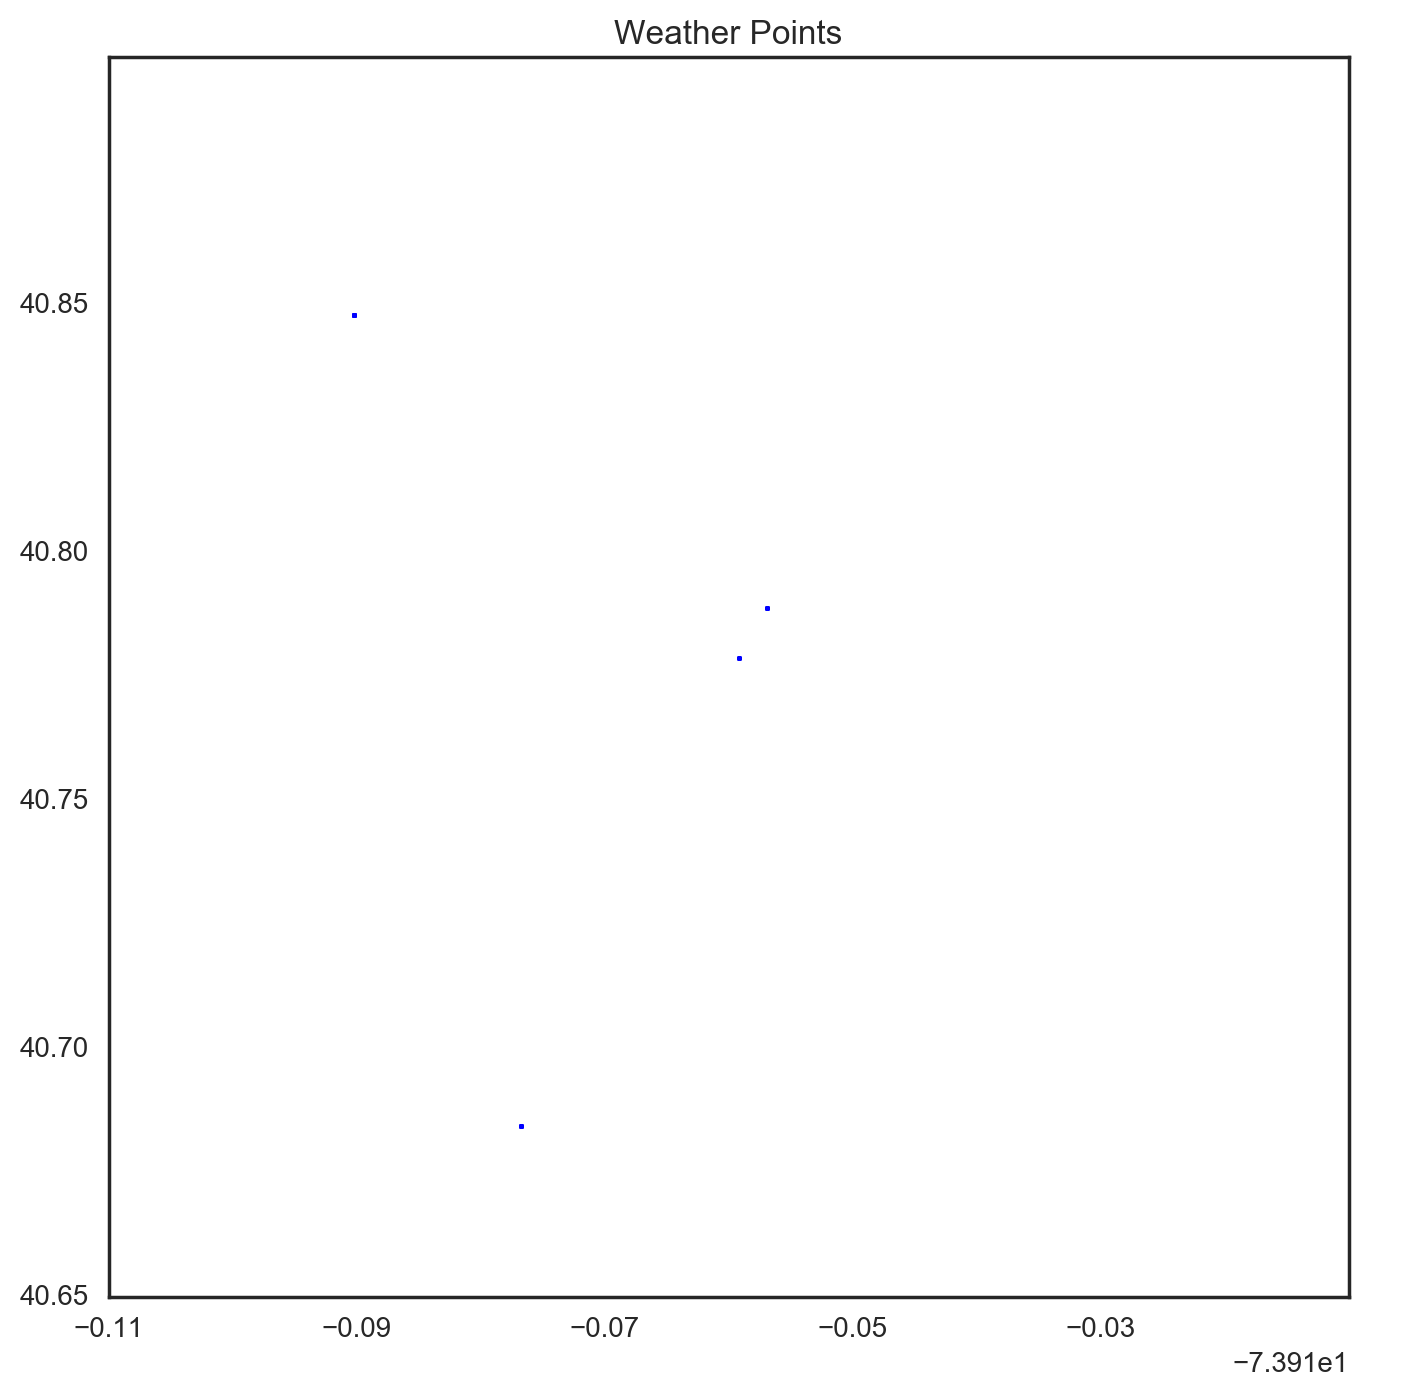

In [7]:
weather = pd.read_csv("dataset/weather/noaa_june_nyc.csv")

sns.set_style('white')
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(weather.LONGITUDE, weather.LATITUDE, s=2, color='blue', alpha=1)
ax.set_xlim(-74.02, -73.92)
ax.set_ylim(40.65,40.90)
ax.set_title('Weather Points')

# 1. Importing the Data

In [9]:
# import our two trip data files
df_yellow = pd.read_csv("dataset/taxi/months/yellow_tripdata_2016-01.csv", nrows=1000000)

In [103]:
df_yellow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 19 columns):
VendorID                 1000000 non-null int64
tpep_pickup_datetime     1000000 non-null object
tpep_dropoff_datetime    1000000 non-null object
passenger_count          1000000 non-null int64
trip_distance            1000000 non-null float64
pickup_longitude         1000000 non-null float64
pickup_latitude          1000000 non-null float64
RatecodeID               1000000 non-null int64
store_and_fwd_flag       1000000 non-null object
dropoff_longitude        1000000 non-null float64
dropoff_latitude         1000000 non-null float64
payment_type             1000000 non-null int64
fare_amount              1000000 non-null float64
extra                    1000000 non-null float64
mta_tax                  1000000 non-null float64
tip_amount               1000000 non-null float64
tolls_amount             1000000 non-null float64
improvement_surcharge    1000000 non-null float64

# 2. Cleaning the Data

## 2.1 Dropping Irrelevant Columns

In [104]:
# lets go ahead and drop some inconsequential rows to analysis
# do not need the fare breakdown as tip percentage can be calculated solely on total_amount
df_yellow.drop('VendorID', axis=1, inplace=True)
df_yellow.drop('extra', axis=1, inplace=True)
df_yellow.drop('mta_tax', axis=1, inplace=True)
df_yellow.drop('tolls_amount', axis=1, inplace=True)
df_yellow.drop('improvement_surcharge', axis=1, inplace=True)
df_yellow.drop('store_and_fwd_flag', axis=1, inplace=True)
df_yellow.drop('RatecodeID', axis=1, inplace=True)

## 2.2 Payment Type

In [105]:
# lets checkout the distribution of payment types to see if any filtering can be applied there
df_yellow[(df_yellow.tip_amount > 0)].groupby(['payment_type']).size()

payment_type
1    540934
2        12
3         2
4         1
dtype: int64

In [106]:
# seems that only credit cards are receiving tips so lets only focus there
df_yellow.drop(df_yellow[df_yellow.payment_type != 1].index, inplace=True)

In [107]:
# can now just remove payment type since it is all credit card
df_yellow.drop('payment_type', axis=1, inplace=True)

##  2.3 Date Time

## 2.3.1 Calculating Total Trip Time in Seconds and Adding Day of Week

In [108]:
# can't recall what format the datetime is in
df_yellow.tpep_pickup_datetime.head()

1     2016-01-01 00:00:00
2     2016-01-01 00:00:00
11    2016-01-01 00:00:03
13    2016-01-01 00:00:04
14    2016-01-01 00:00:05
Name: tpep_pickup_datetime, dtype: object

In [109]:
date_format = '%Y-%m-%d %H:%M:%S'

# returns the total number of seconds for a trip
def time_calc(row):
    time1 = row['tpep_pickup_datetime']
    time2 = row['tpep_dropoff_datetime']
    return (datetime.datetime.strptime(time2, date_format) - datetime.datetime.strptime(time1, date_format)).total_seconds()

# returns an integer value based on day of the week 0 - Monday ... 6 - Sunday
def weekday_calc(row):
    time1 = datetime.datetime.strptime(row['tpep_pickup_datetime'], date_format)
    return time1.weekday()

In [110]:
df_yellow['trip_time'] = df_yellow.apply(time_calc, axis=1)
df_yellow['day_of_week'] = df_yellow.apply(weekday_calc, axis=1)
df_yellow.drop('tpep_pickup_datetime', axis=1, inplace=True) # might actually be beneficial to keep this or break into timeslots of just hour of day
df_yellow.drop('tpep_dropoff_datetime', axis=1, inplace=True)

In [111]:
df_yellow.trip_time.describe()

count    567372.000000
mean        881.471262
std        3490.951046
min         -40.000000
25%         360.750000
50%         594.000000
75%         956.000000
max       86379.000000
Name: trip_time, dtype: float64

In [112]:
# well 24 hours for a trip seems just absurd and likely bad data, as does anything shorter than a couple mins. 
# lets set a minimum trip time of 2 min (120s) and max trip time of 3 hours (10800)
df_yellow.drop(df_yellow[((df_yellow.trip_time < 120) | (df_yellow.trip_time > 10800))].index, inplace=True)
df_yellow.trip_time.describe()

count    554925.000000
mean        752.369736
std         546.620419
min         120.000000
25%         373.000000
50%         603.000000
75%         964.000000
max       10527.000000
Name: trip_time, dtype: float64

## 2.4 Tip Percentage
Decided to break tips into ranges based upon tip percentage. I think this may be particularly helpful for accurately predicting smaller fares where it is not uncommon to see a \$4 tip on a \$4 fare (100% tip). Whereas, a \$4 tip on a $20 fare would only be a 20% tip. 

We reduced the amount of targets beacuse we were getting low accuracy scores

In [113]:
# returns the tip as a percentage of the subtotal (total - tip) split into categories
def tip_calc(row):
    tip = row['tip_amount']
    total = row['total_amount']
    pct = tip / (total - tip) * 100
    return int(round(pct))
    
#    # split the pct into categories, this may be too narrow
#    if pct <= 5:
#        return 0 # 0-5%
#    elif pct <= 10:
#        return 1 # 5-10%
#    elif pct <= 15:
#        return 2 # 10-15%
#    elif pct <= 20:
#        return 3 # 15-20%
#    elif pct <= 25:
#        return 4 # 20-25%
#    elif pct <= 30:
#        return 5 # 25-30%
#    elif pct <= 35:
#       return 6 # 30-35%
#    elif pct <= 100: # set this as the max as anything above is likely an outlier. small fares tend to have larger percentage
#        return 7 # 35-100%
#    else: 
#        return 8 # >100% could drop these if we want

In [114]:
# drop any total amounts of 0 or lower
df_yellow.drop(df_yellow[df_yellow.total_amount <= 0].index, inplace=True)

# nyc has an initial fare of 2.50 so anything less is likely a bad value
df_yellow.drop(df_yellow[df_yellow.fare_amount <= 2.50].index, inplace=True)

# calculate tips then drop tip amount and total amount
df_yellow['tip_percentage'] = df_yellow.apply(tip_calc, axis=1)
df_yellow.drop('tip_amount', axis=1, inplace=True)
df_yellow.drop('total_amount', axis=1, inplace=True)

## 2.5 Trip Distance
Remove any trips with a distance of 0.

In [115]:
df_yellow.drop(df_yellow[df_yellow.trip_distance == 0].index, inplace=True)

## 2.6 Lat Long
Focus our coordinates on the NYC area to remove any bad locations.

In [116]:
'''
NYC Area
latitude	40.459518	41.175342
longitude	−74.361107	−71,903083
'''

df_yellow.drop(df_yellow[((df_yellow.pickup_latitude < 40.459518) | (df_yellow.pickup_latitude > 41.175342))].index, inplace=True)
df_yellow.drop(df_yellow[((df_yellow.dropoff_latitude < 40.459518) | (df_yellow.dropoff_latitude > 41.175342))].index, inplace=True)
df_yellow.drop(df_yellow[((df_yellow.pickup_longitude < -74.361107) | (df_yellow.pickup_longitude > -71.903083))].index, inplace=True)
df_yellow.drop(df_yellow[((df_yellow.dropoff_longitude < -74.361107) | (df_yellow.dropoff_longitude > -71.903083))].index, inplace=True)

## 2.7 Cleaned Data

In [117]:
df_yellow.head()

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,trip_time,day_of_week,tip_percentage
11,6,2.43,-73.969330,40.763538,-73.995689,40.744251,12.0,946.0,4,30
13,1,3.70,-74.004303,40.742241,-74.007362,40.706936,14.0,868.0,4,20
14,2,2.20,-73.991997,40.718578,-74.005135,40.739944,11.0,862.0,4,12
17,1,1.70,-73.982101,40.774696,-73.970940,40.796707,7.0,278.0,4,20
18,1,1.38,-73.994843,40.718498,-73.989807,40.734230,7.0,428.0,4,20


In [118]:
def precision1(row):
    val = float(row.pickup_longitude)
    return round(val, 2)
def precision2(row):
    val = float(row.pickup_latitude)
    return round(val, 2)
def precision3(row):
    val = float(row.dropoff_longitude)
    return round(val, 2)
def precision4(row):
    val = float(row.dropoff_latitude)
    return round(val, 2)

df_yellow.pickup_longitude = df_yellow.apply(precision1, axis=1)
df_yellow.pickup_latitude = df_yellow.apply(precision2, axis=1)
df_yellow.dropoff_longitude = df_yellow.apply(precision3, axis=1)
df_yellow.dropoff_latitude = df_yellow.apply(precision4, axis=1)

In [119]:
df_yellow.head()

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,trip_time,day_of_week,tip_percentage
11,6,2.43,-73.97,40.76,-74.00,40.74,12.0,946.0,4,30
13,1,3.70,-74.00,40.74,-74.01,40.71,14.0,868.0,4,20
14,2,2.20,-73.99,40.72,-74.01,40.74,11.0,862.0,4,12
17,1,1.70,-73.98,40.77,-73.97,40.80,7.0,278.0,4,20
18,1,1.38,-73.99,40.72,-73.99,40.73,7.0,428.0,4,20


# 3. Visualizing the Data for Trends

## 3.1 Tips

It appears that most riders tend to fall into the 15-20% (3) range when tipping drivers. Surprisingly there are good number of people that tip 0-5% (0). Is the service really that bad, or are people really that cheap?

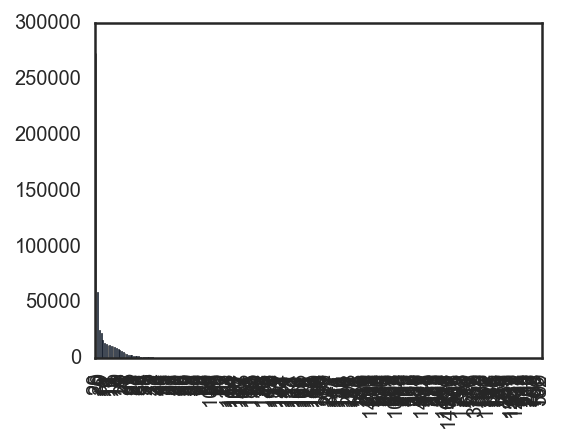

In [120]:
df_yellow.tip_percentage.value_counts().plot('bar')

In [122]:
s = df_yellow.groupby(['day_of_week'])['tip_percentage'].mean().reset_index(name='mean')
s

,day_of_week,mean
0,0,18.690999
1,4,19.115400
2,5,18.851528
3,6,18.647568


## 3.2 Pickups vs Dropoffs
While the volume of activity in Manhattan appears to stay consistent, dropoff activity is definitely higher on the outskirts of the city.

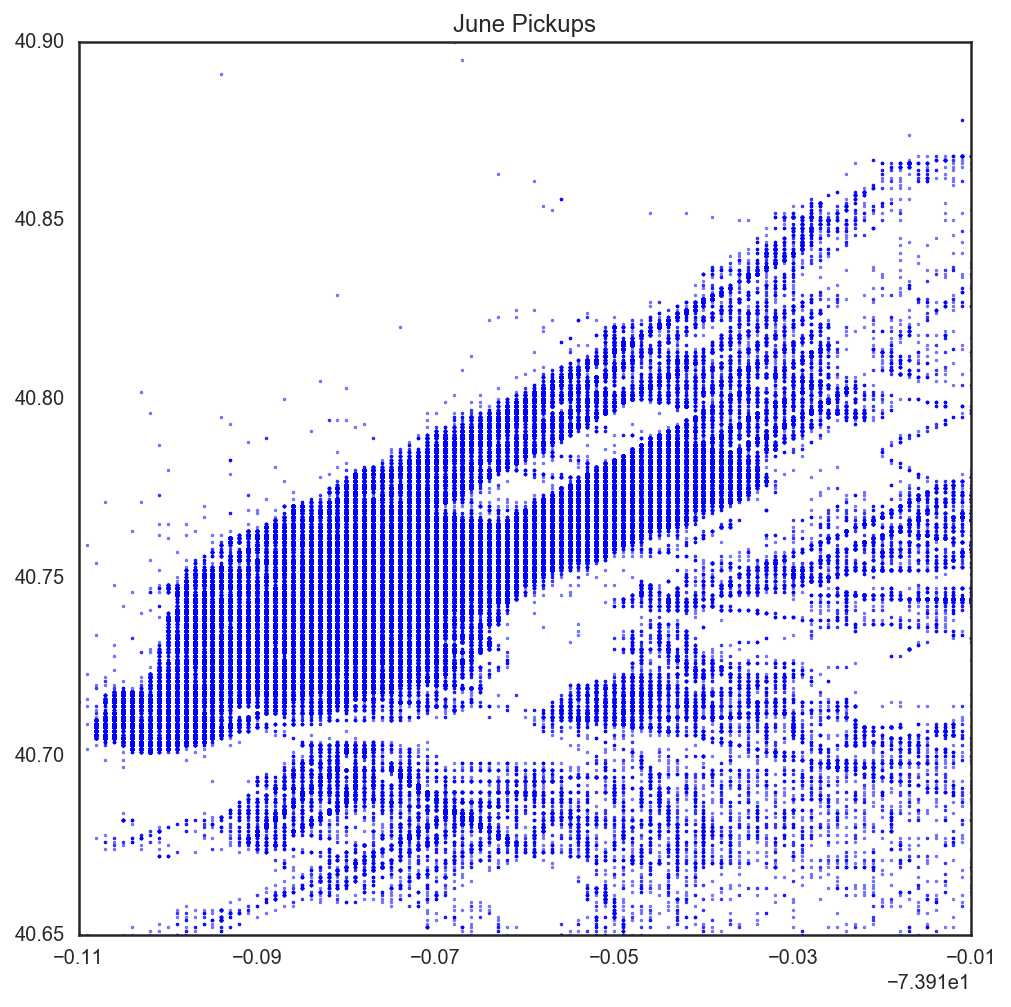

In [54]:
sns.set_style('white')

fig, ax = plt.subplots(figsize=(8, 8))

ax.scatter(df_yellow.pickup_longitude, df_yellow.pickup_latitude, s=2, color='blue', alpha=0.5)

ax.set_xlim(-74.02, -73.92)
ax.set_ylim(40.65,40.90)
ax.set_title('June Pickups')

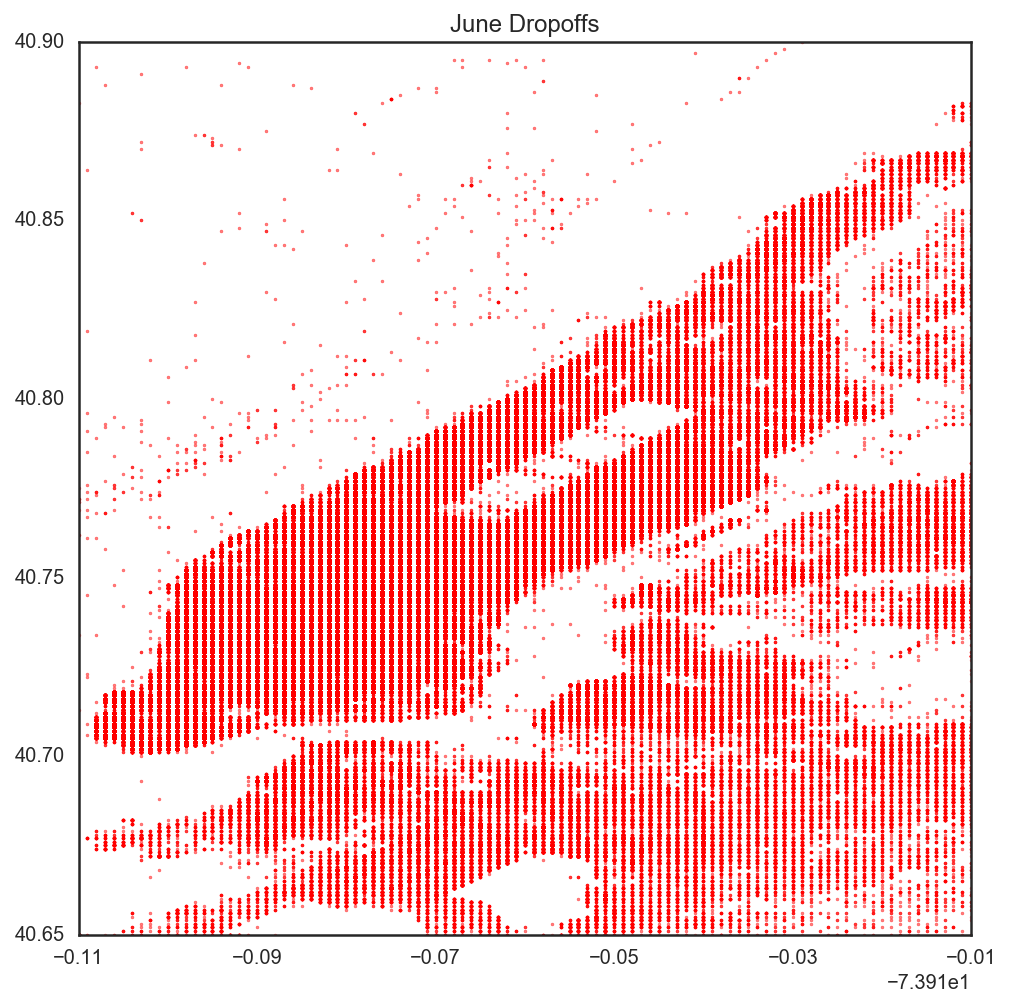

In [55]:
sns.set_style('white')

fig, ax = plt.subplots(figsize=(8, 8))

ax.scatter(df_yellow.dropoff_longitude, df_yellow.dropoff_latitude, s=2, color='red', alpha=0.5)

ax.set_xlim(-74.02, -73.92)
ax.set_ylim(40.65,40.90)
ax.set_title('June Dropoffs')

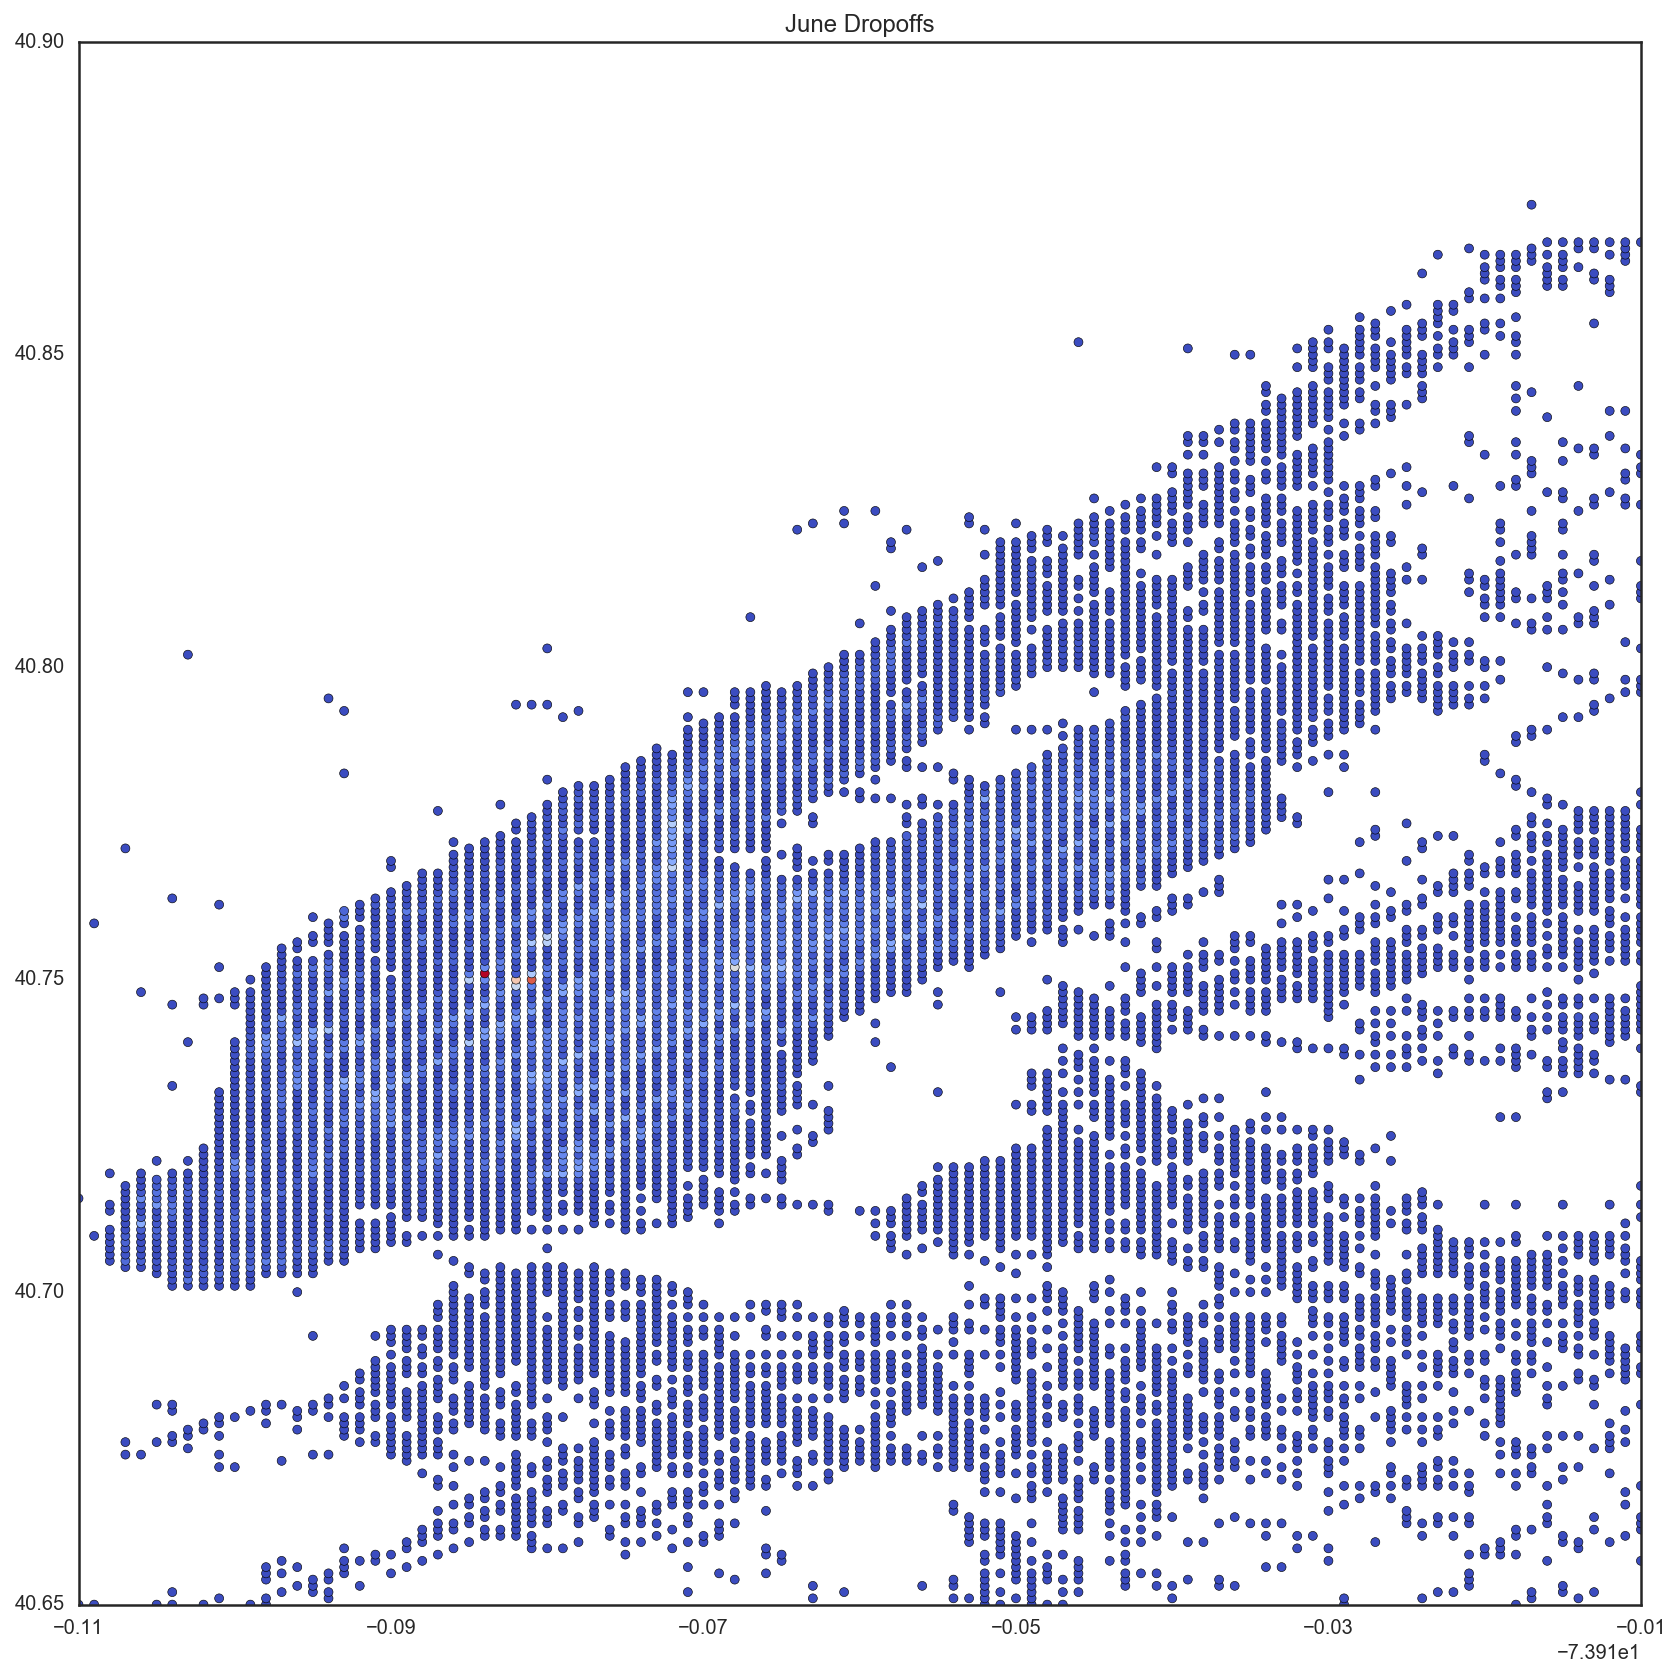

In [101]:
df2 = df_yellow.groupby(['pickup_longitude', 'pickup_latitude']).size().reset_index(name='total')
df2.total = df2.total.astype(float)

sns.set_style('white')

fig, ax = plt.subplots(figsize=(14, 14))

ax.scatter(df2.pickup_longitude, df2.pickup_latitude, c=df2.total, cmap=cm.coolwarm)

ax.set_xlim(-74.02, -73.92)
ax.set_ylim(40.65,40.90)
ax.set_title('June Dropoffs')

## 3.3 Trip Frequency by Day of Week in June

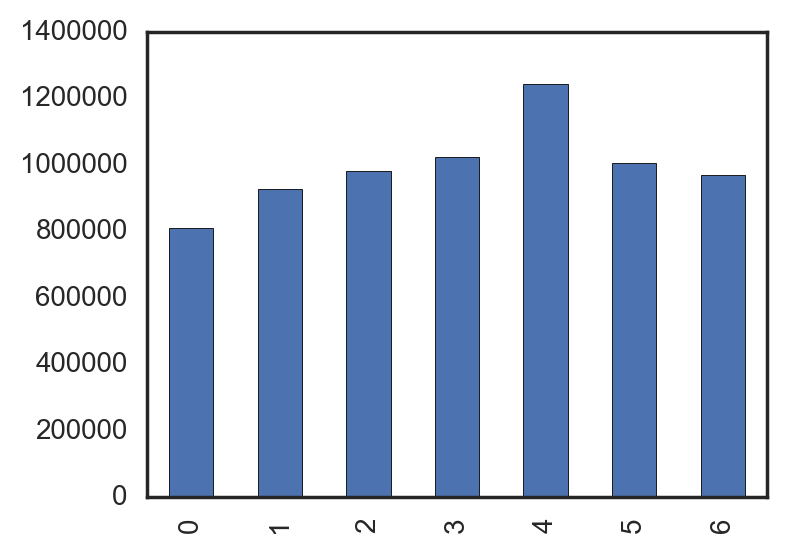

In [57]:
df_yellow.day_of_week.value_counts(sort=False).plot('bar')

## 3.4 Data Heat Map

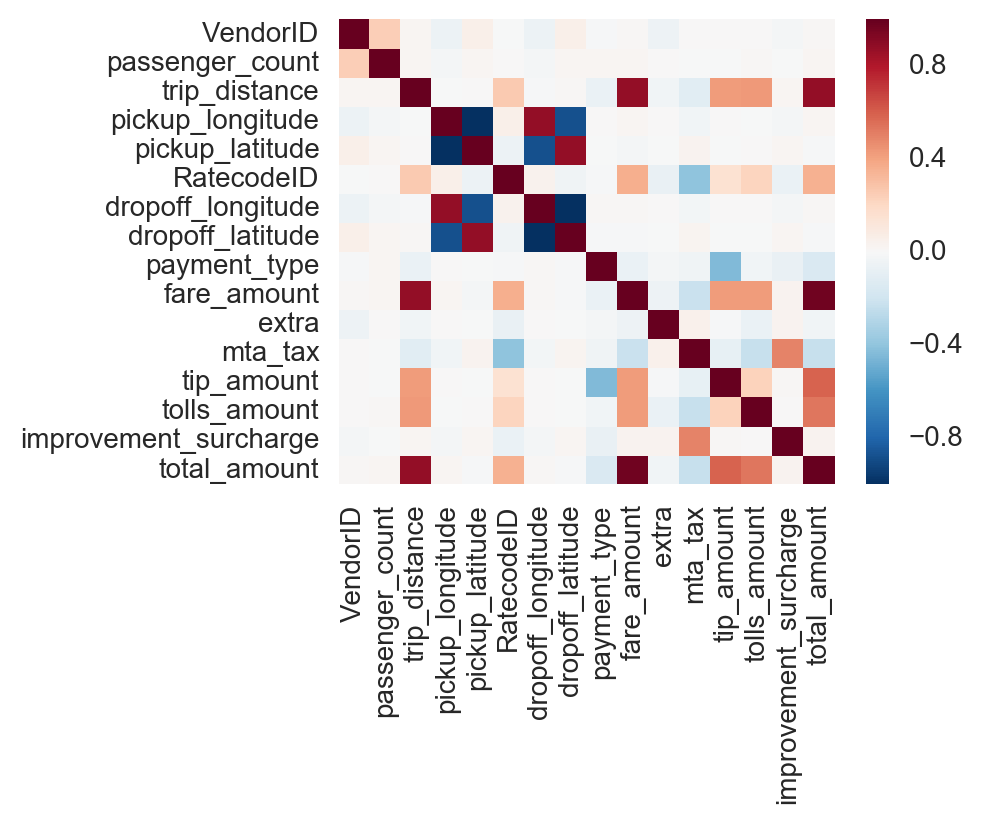

In [10]:
# HEAT MAP
sns.heatmap(df_yellow.corr())